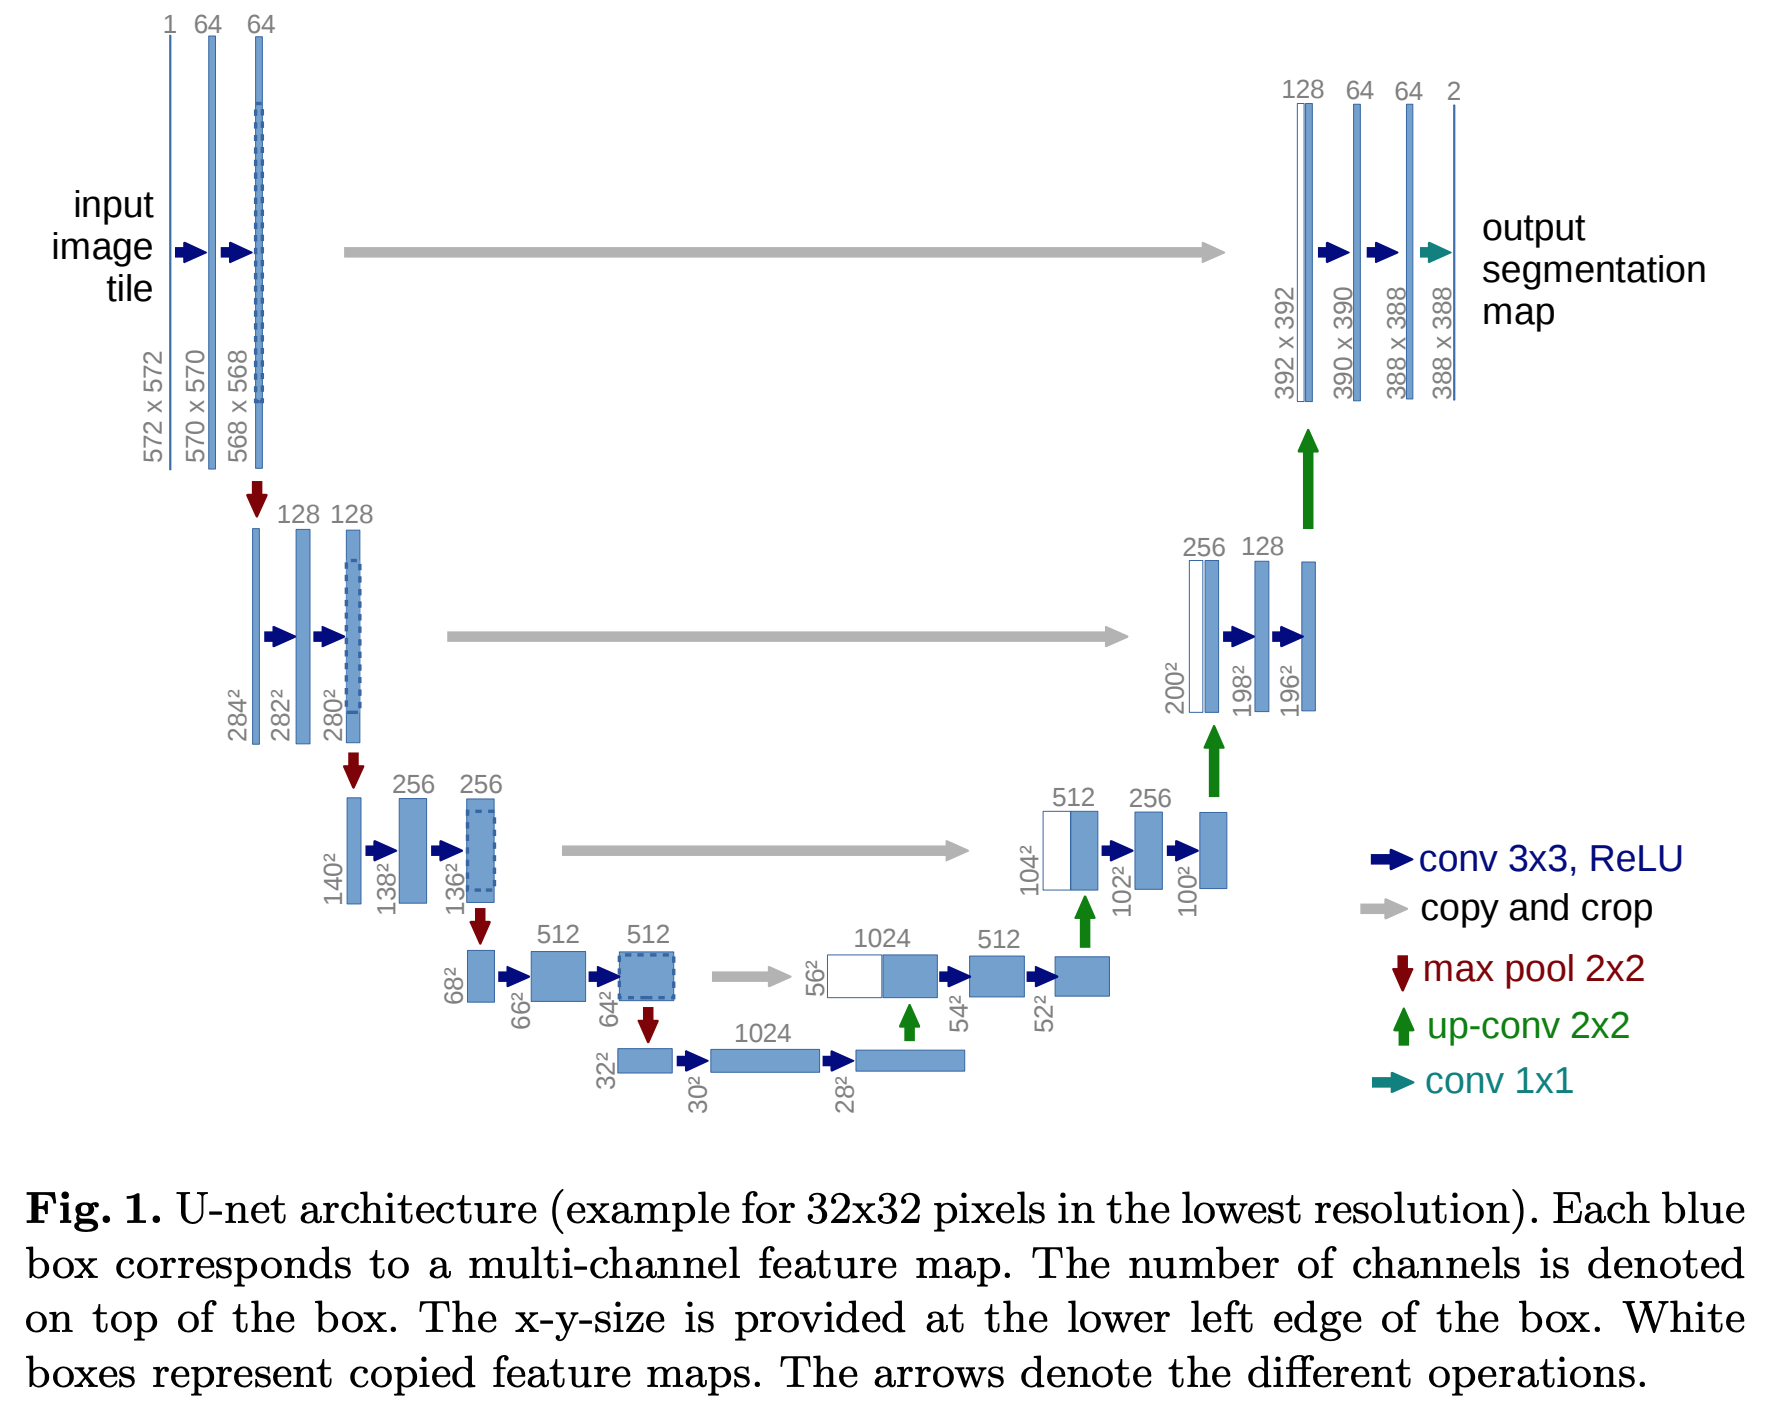

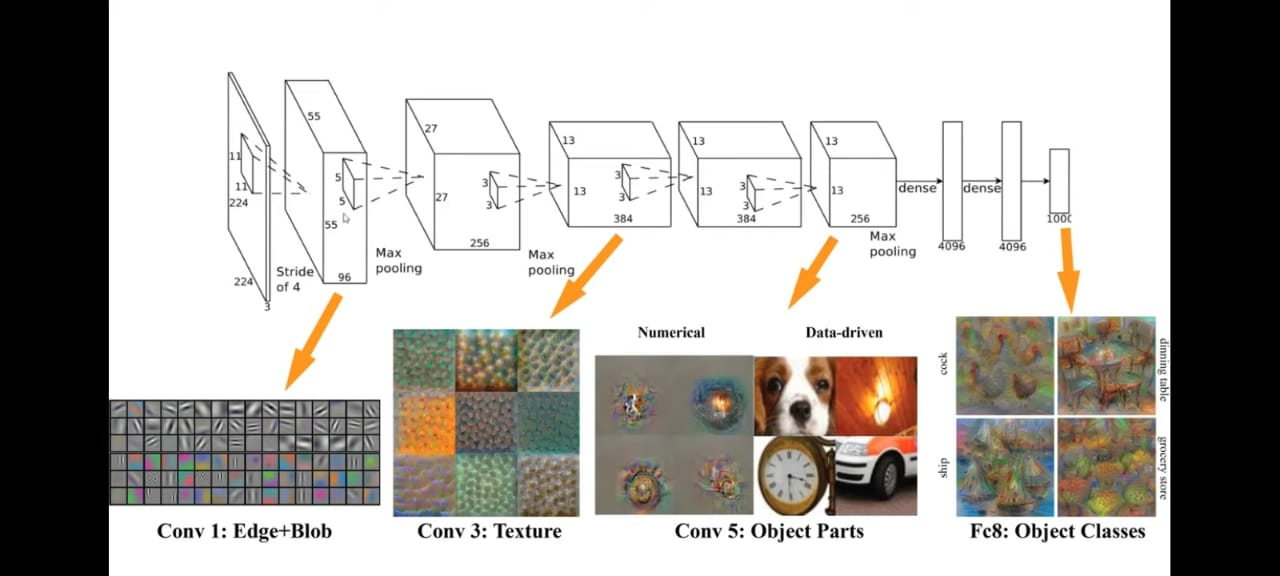

# Define network in keras

In [ ]:
# Initial built model of U-net
def initial_model(self,pretrained_weight=None,input_size=(256,256,1)):

        inputs=Input((1,img_rows,img_cols))
        conv1=Convolution2D(32,3,3,activation="relu",border_mode="same")(inputs)
        conv1=Convolution2D(32,3,3,activation="relu",border_mode="same")(conv1)
        pool1=MaxPooling2D(pool_size=(2,2))(conv1)

        conv2=Convolution2D(64,3,3,activation="relu",border_mode="same")(pool1)
        conv2=Convolution2D(64,3,3,activation="relu",border_mode="same")(conv2)
        pool2=MaxPooling2D(pool_size=(2,2))(conv2)

        conv3=Convolution2D(128,3,3,activation="relu",border_mode="same")(pool2)
        conv3=Convolution2D(128,3,3,activation="relu",border_mode="same")(conv3)
        pool3=MaxPooling2D(pool_size=(2,2))(conv3)

        conv4=Convolution2D(256,3,3,activation="relu",border_mode="same")(pool3)
        conv4=Convolution2D(256,3,3,activation="relu",border_mode="same")(conv4)
        pool4=MaxPooling2D(pool_size=(2,2))(conv4)

        conv5=Convolution2D(512,3,3,activation="relu",border_mode="same")(pool4)
        conv5=Convolution2D(512,3,3,activation="relu",border_mode="same")(conv5)
        # pool5=MaxPooling2D(pool_size=(2,2))(conv5)

        up6=merge([Convolution2D(256,3,3,activation="relu",border_mode="same")(UpSampling2D(size=(2,2)(conv5)),conv4],mode="concat",concat_axis=1)
        conv6=Convolution2D(256,3,3,activaion="relu",border_mode="same")(up6)
        conv6=Convolution2D(256,3,3,activaion="relu",border_mode="same")(conv6)

        up7=merge([Convolution2D(128,3,3,activation="relu",border_mode="same")(UpSampling2D(size=(2,2)(conv6)),conv5],mode="concat",concat_axis=1)
        conv7=Convolution2D(128,3,3,activaion="relu",border_mode="same")(up7)
        conv7=Convolution2D(128,3,3,activaion="relu",border_mode="same")(conv7)

        up8=merge([Convolution2D(64,3,3,activation="relu",border_mode="same")(UpSampling2D(size=(2,2)(conv7)),conv6],mode="concat",concat_axis=1)
        conv8=Convolution2D(64,3,3,activaion="relu",border_mode="same")(up8)
        conv8=Convolution2D(64,3,3,activaion="relu",border_mode="same")(conv8)

        up9=merge([Convolution2D(32,3,3,activation="relu",border_mode="same")(UpSampling2D(size=(2,2)(conv9)),conv9],mode="concat",concat_axis=1)
        conv9=Convolution2D(32,3,3,activaion="relu",border_mode="same")(up9)
        conv9=Convolution2D(32,3,3,activaion="relu",border_mode="same")(conv9)

        conv10=Convolution2D(1,1,1,activation="sigmoid")(conv9)

        model=Model(input=inputs,output=conv10)
        #then compile the model
        model.compile(optimizer=Adam(lr=1e-5),loss="binary_crossentropy",metrics=["accuracy"])
        # model.summary()


        if pretrained_weight:
          model.load_weight(pretrained_weight)

        return model

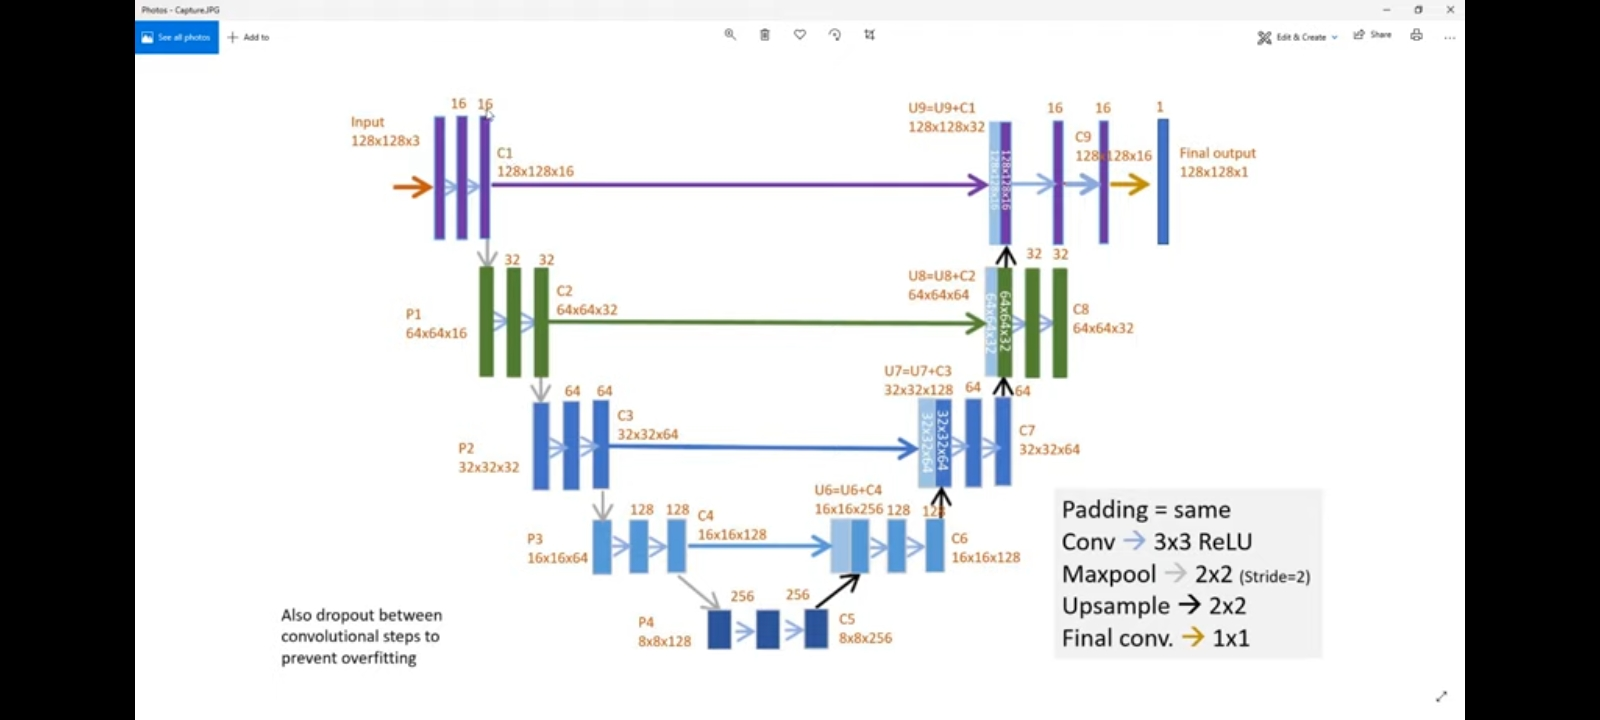

he_normal . It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

glorot_uniform . Draws samples from a uniform distribution within [-limit, limit] , where limit = sqrt(6 / (fan_in + fan_out)) ( fan_in is the number of input units in the weight tensor and fan_out is the number of output units). Examples. >>> # Standalone usage: >>> initializer = tf.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time,

What is Conv2DTranspose layer?



Two common types of layers that can be used in the generator model are a upsample layer (UpSampling2D) that simply doubles the dimensions of the input and the transpose convolutional layer (Conv2DTranspose) that performs an inverse convolution operation.

In [ ]:
import tensorflow as tf
from tensorflow import keras
IMG_HEIGHT=128
IMG_WIDTH=128
IMG_CHANNELS=3
# Build the model
inputs=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
# kernel_initalizer means when we takes the weight and update the weights then what will be initial weight for that we used weight initial values
s=tf.keras.layers.Lambda(lambda x:x/255)(inputs) # every image pixels 0 to 255 so we have  rescale this
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

##Model Fitting,Checkpoints,Early Stopping and Callbacks

In [ ]:
Callbacks are essential when you want to control the training of a model. And you do want to control the training… Callbacks help us prevent overfitting, visualize our training progress, save checkpoints and much more.

In [ ]:
* if you put too many epochs then  it probabily may be over fitting
* if you put less number of epochs then it probabily may be under fitting


In [ ]:
##ModelCheckpoints
checkpoint=tf.keras.callbacks.ModelCheckpoint("model_for_nuclei.h5",verbose=1,save_best_only=True)
callbacks=[
           tf.keras.callbacks.EarlyStopping(patience=2,
                                            monitor="val_loss"),
           tf.keras.callbacks.TensorBoard(log_dir="logs")
] 
results=model.fit(X,Y,validation_split=0.1,batch_size=16,epochs=25,callbacks=callbacks)


##UnderStanding the data and gettig it ready for U-Net


tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. 

preserve_range : (bool, optional)=Whether to keep the original range of values. Otherwise, the input image is converted according to the conventions of img_as_float.


In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH=zip_ref
TRAIN_PATH = '/content/drive/MyDrive/Unet_Image_Process/stage1_train.zip'
TEST_PATH = '/content/drive/MyDrive/Unet_Image_Process/stage1_test.zip'

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
# squeeze() function is used when we want to remove single-dimensional entries from the shape of an array
imshow(np.squeeze(Y_train[image_x]))
plt.show()




#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

####################################

idx = random.randint(0, len(X_train))# Randomly piks the image


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


# showing the some thresholdig over here 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()